 install MySQL Connector for building connection with MySQL

In [2]:
!pip install mysql-connector-python

importing libraries

In [3]:
import pandas as pd
import numpy as np
import mysql.connector

Creating Connection

In [4]:
con=mysql.connector.connect( 
host="localhost",
port=3306,
user="root",
password='engage1988',
database='student')

In [5]:
df=pd.read_sql_query('select * from studmarks',con)

In [6]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,None,55,45,56,87,21,52,89,65
1,Suresh,M,None,75,96,78,64,90,61,58,2
2,Ramesh,M,None,25,54,89,76,95,87,56,74
3,Jessica,F,None,78,96,86,63,54,89,75,45
4,Jennifer,F,None,58,96,78,46,96,77,83,53
5,Annu,F,None,45,87,52,89,55,89,87,52
6,pooja,F,None,55,64,61,58,75,58,64,61
7,Ritesh,M,None,54,76,87,56,25,56,76,87
8,Farha,F,None,55,63,89,75,78,75,63,89
9,Mukesh,M,None,96,46,77,83,58,83,46,77


Since DOB is irrelevant for the EDA it is being dropped

In [7]:
df=df.drop(['DOB'],axis=1)

In [8]:
df=pd.DataFrame(df)

In [9]:
df

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,55,45,56,87,21,52,89,65
1,Suresh,M,75,96,78,64,90,61,58,2
2,Ramesh,M,25,54,89,76,95,87,56,74
3,Jessica,F,78,96,86,63,54,89,75,45
4,Jennifer,F,58,96,78,46,96,77,83,53
5,Annu,F,45,87,52,89,55,89,87,52
6,pooja,F,55,64,61,58,75,58,64,61
7,Ritesh,M,54,76,87,56,25,56,76,87
8,Farha,F,55,63,89,75,78,75,63,89
9,Mukesh,M,96,46,77,83,58,83,46,77


In [10]:
#checking datatypes
df.dtypes

Name         object
Gender       object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [11]:
df.shape

(10, 10)

In [12]:
#dataset secription
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [13]:
#checking column names
df.columns

Index(['Name', 'Gender', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology',
       'Economics', 'History', 'Civics'],
      dtype='object')

In [14]:
#checking null values
df.isnull().sum()

Name         0
Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [15]:
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
#label encoder to change gender dtype
import sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype(str))

In [18]:
df

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,1,55,45,56,87,21,52,89,65
1,Suresh,1,75,96,78,64,90,61,58,2
2,Ramesh,1,25,54,89,76,95,87,56,74
3,Jessica,0,78,96,86,63,54,89,75,45
4,Jennifer,0,58,96,78,46,96,77,83,53
5,Annu,0,45,87,52,89,55,89,87,52
6,pooja,0,55,64,61,58,75,58,64,61
7,Ritesh,1,54,76,87,56,25,56,76,87
8,Farha,0,55,63,89,75,78,75,63,89
9,Mukesh,1,96,46,77,83,58,83,46,77


In [19]:
#Calculating total percentage scored by each student
df['Total']=df.iloc[:,2:11].sum(axis=1)
df['Total Percentage']=df['Total']/8

In [20]:
df

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Total Percentage
0,John,1,55,45,56,87,21,52,89,65,470,58.750
1,Suresh,1,75,96,78,64,90,61,58,2,524,65.500
2,Ramesh,1,25,54,89,76,95,87,56,74,556,69.500
3,Jessica,0,78,96,86,63,54,89,75,45,586,73.250
4,Jennifer,0,58,96,78,46,96,77,83,53,587,73.375
5,Annu,0,45,87,52,89,55,89,87,52,556,69.500
6,pooja,0,55,64,61,58,75,58,64,61,496,62.000
7,Ritesh,1,54,76,87,56,25,56,76,87,517,64.625
8,Farha,0,55,63,89,75,78,75,63,89,587,73.375
9,Mukesh,1,96,46,77,83,58,83,46,77,566,70.750


In [21]:
#setting name as index
df=df.set_index(['Name'])

In [22]:
#Correlation
df.corr()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Total Percentage
Gender,1.000000,0.075832,-0.454052,0.158109,0.255257,-0.269398,-0.353067,-0.342774,0.020796,-0.460027,-0.460027
Maths,0.075832,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629,0.156049,0.156049
Physics,-0.454052,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266,0.372033,0.372033
Chemistry,0.158109,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908,0.545944,0.545944
English,0.255257,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705,-0.132607,-0.132607
Biology,-0.269398,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060,0.489008,0.489008
Economics,-0.353067,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905,0.830433,0.830433
History,-0.342774,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686,-0.199145,-0.199145
Civics,0.020796,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000,0.082574,0.082574
Total,-0.460027,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000,1.000000


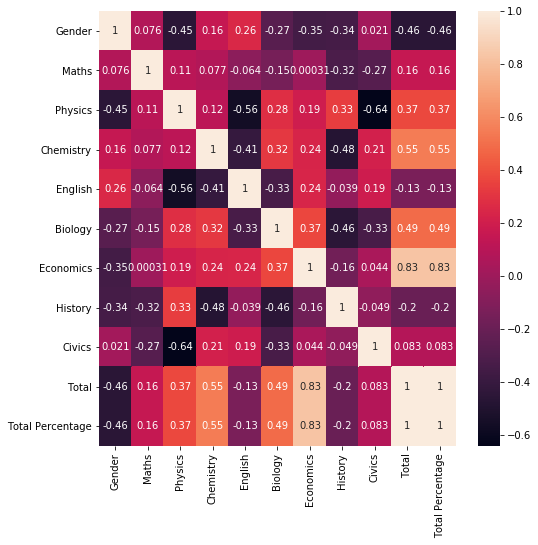

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

Gender has negetive correlation with Total Percentage and Physics i.e on an average females scored better than males.Maths has no significant correlation. Physics has negetive correlation with English and Civics i.e those who Scored high in Physics scored relatively lower on Civics and english.Similarly, Chemistry has positive correlation with Total percentage and negetive correlation with History and English.English has negetive correlation with Physics.Biology has positive correlation with Total Percentage and negetive correlation with History. Economics has very high positive correlation with total percentage.

In [24]:
#dropping Total column since it has 100% correlation with percentage
df=df.drop(['Total'],axis=1)

In [25]:
df

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total Percentage
Name,,,,,,,,,,
John,1,55,45,56,87,21,52,89,65,58.750
Suresh,1,75,96,78,64,90,61,58,2,65.500
Ramesh,1,25,54,89,76,95,87,56,74,69.500
Jessica,0,78,96,86,63,54,89,75,45,73.250
Jennifer,0,58,96,78,46,96,77,83,53,73.375
Annu,0,45,87,52,89,55,89,87,52,69.500
pooja,0,55,64,61,58,75,58,64,61,62.000
Ritesh,1,54,76,87,56,25,56,76,87,64.625
Farha,0,55,63,89,75,78,75,63,89,73.375


In [26]:
#checking Skewness
df.skew()

Gender              0.000000
Maths               0.246964
Physics            -0.045336
Chemistry          -0.746462
English            -0.131222
Biology            -0.496446
Economics          -0.245555
History            -0.131222
Civics             -1.332448
Total Percentage   -0.642123
dtype: float64

In [27]:
#checking for outliers
from scipy.stats import zscore
threhold=3
z=np.abs(zscore(df))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


EDA

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

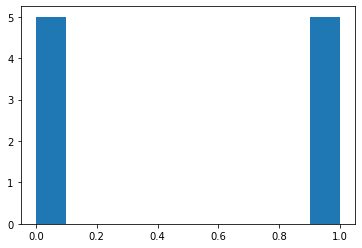

In [28]:
plt.figure()
plt.hist(df['Gender'])

It can be seen that there are 5 male students and 5 female students

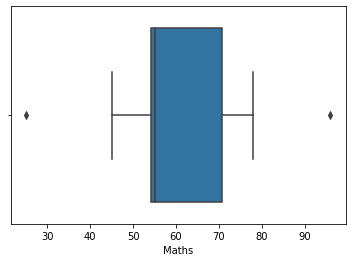

In [29]:
sns.boxplot(df['Maths'])

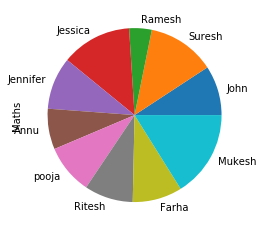

In [30]:
df['Maths'].plot(kind='pie')

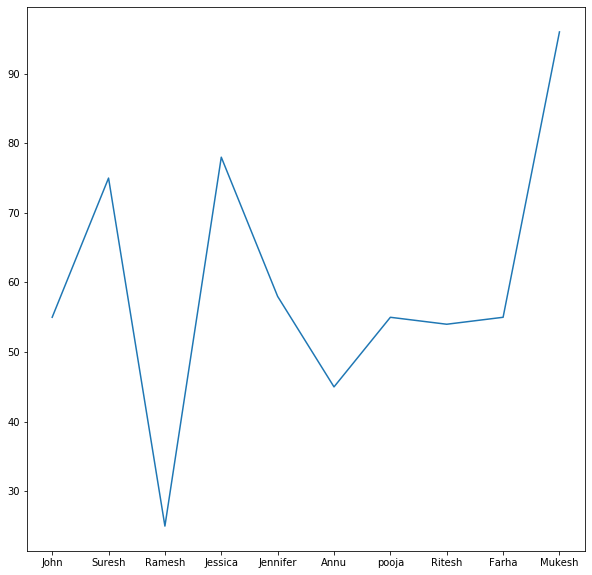

In [31]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Maths'])
plt.show()

It can be seen that Mukesh scored highest in Maths an ramesh had the lowest score with median marks around 55

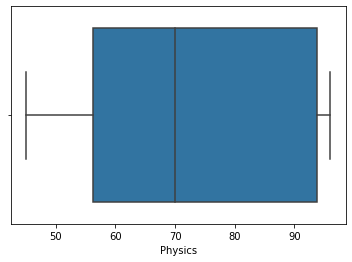

In [32]:
sns.boxplot(df['Physics'])

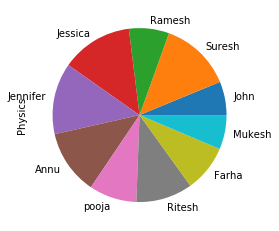

In [33]:
df['Physics'].plot(kind='pie')

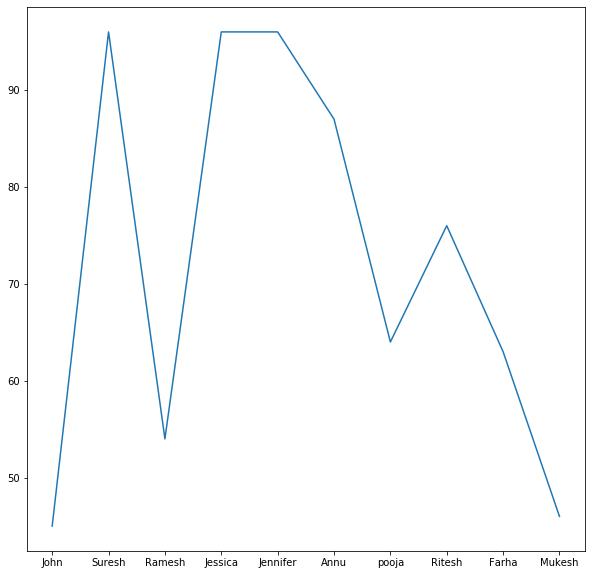

In [34]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Physics'])
plt.show()

Suresh,Jessica and Jennifer have the highest scores and Mukesh has the lowest score in Physics with overall median score being 70

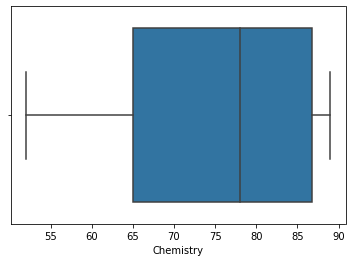

In [35]:
sns.boxplot(df['Chemistry'])

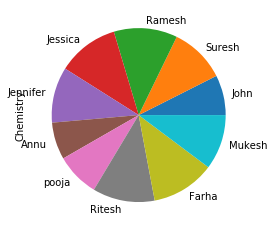

In [36]:
df['Chemistry'].plot(kind='pie')

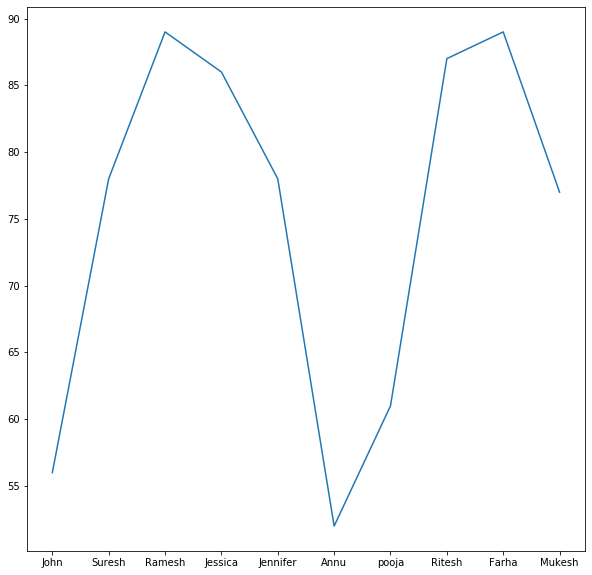

In [37]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Chemistry'])
plt.show()

Ramesh and Farha scores highest in chemistry and Annu scored Lowest with median score of around 75

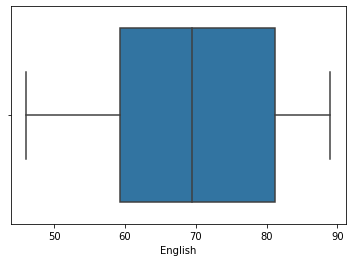

In [38]:
sns.boxplot(df['English'])

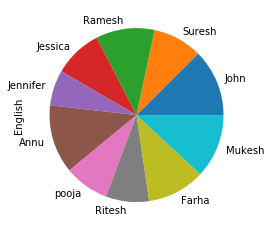

In [39]:
df['English'].plot(kind='pie')

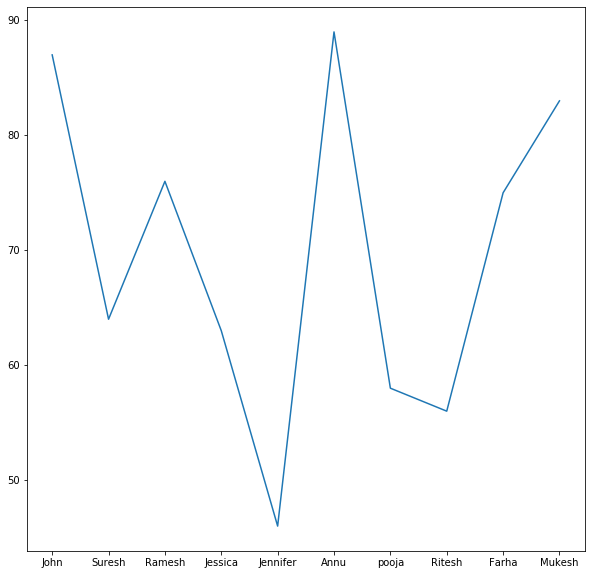

In [40]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['English'])
plt.show()

Annu scored highest in English while Jennifer scored lowest. median score is around 70

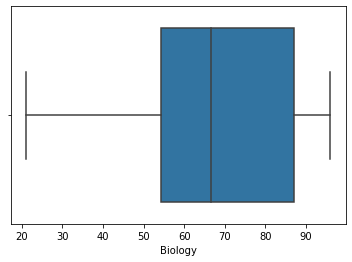

In [41]:
sns.boxplot(df['Biology'])

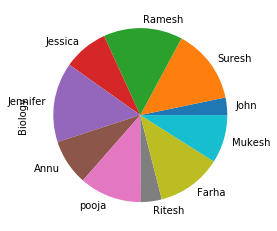

In [42]:
df['Biology'].plot(kind='pie')

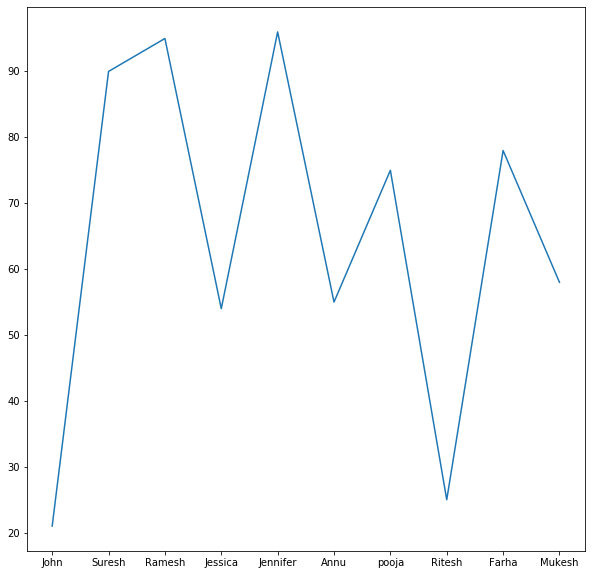

In [43]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Biology'])
plt.show()

Jennifer Scored highest in Biology and John scored lowest. Median score is around 67

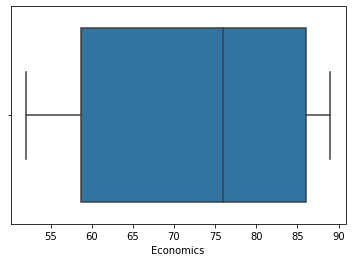

In [44]:
sns.boxplot(df['Economics'])

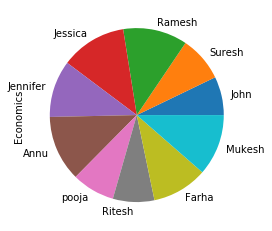

In [45]:
df['Economics'].plot(kind='pie')

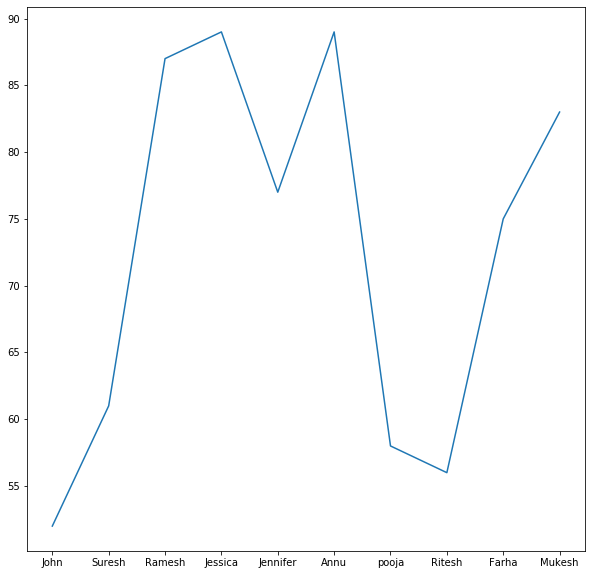

In [46]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Economics'])
plt.show()

Jessica scored highest in economics and John scored lowest with median score of 76

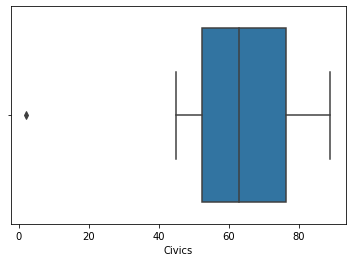

In [47]:
sns.boxplot(df['Civics'])

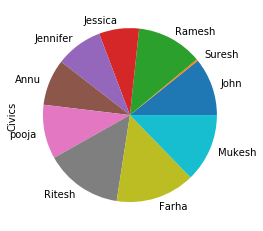

In [48]:
df['Civics'].plot(kind='pie')

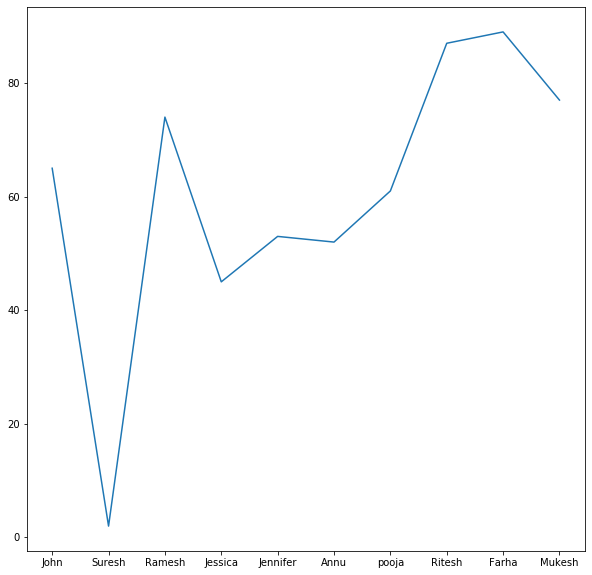

In [49]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Civics'])
plt.show()

Farha scored highest in Civics while Suresh scored lowest. Median score is arounf 63

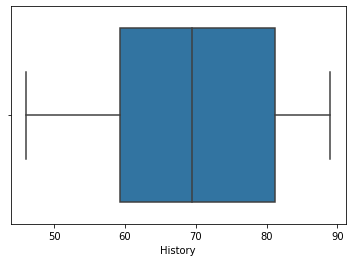

In [50]:
sns.boxplot(df['History'])

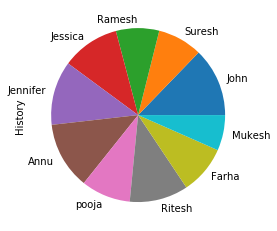

In [51]:
df['History'].plot(kind='pie')

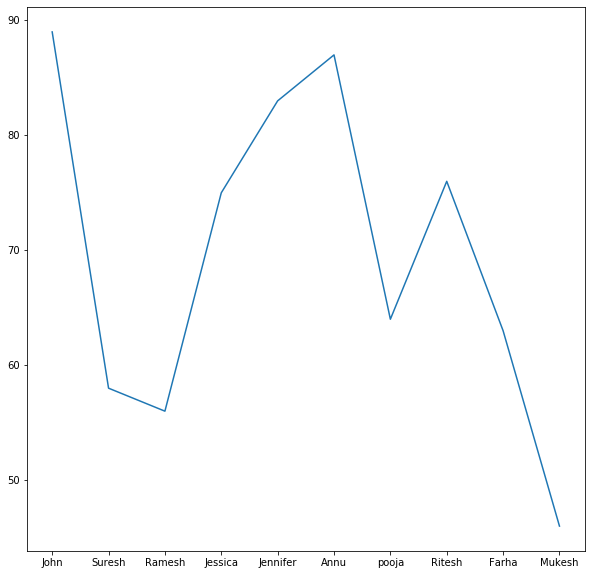

In [52]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['History'])
plt.show()

John Scored  highest in History while Mukesh scored lowest. Median score is 69.

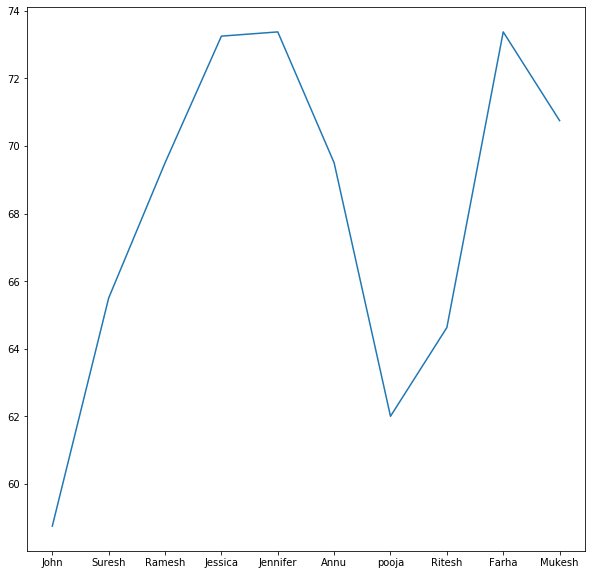

In [53]:
plt.figure(figsize=(10,10))
plt.plot(df.index.values,df['Total Percentage'])
plt.show()

Farha and Jennifer has the highest Total Percentage while John has the lowest.

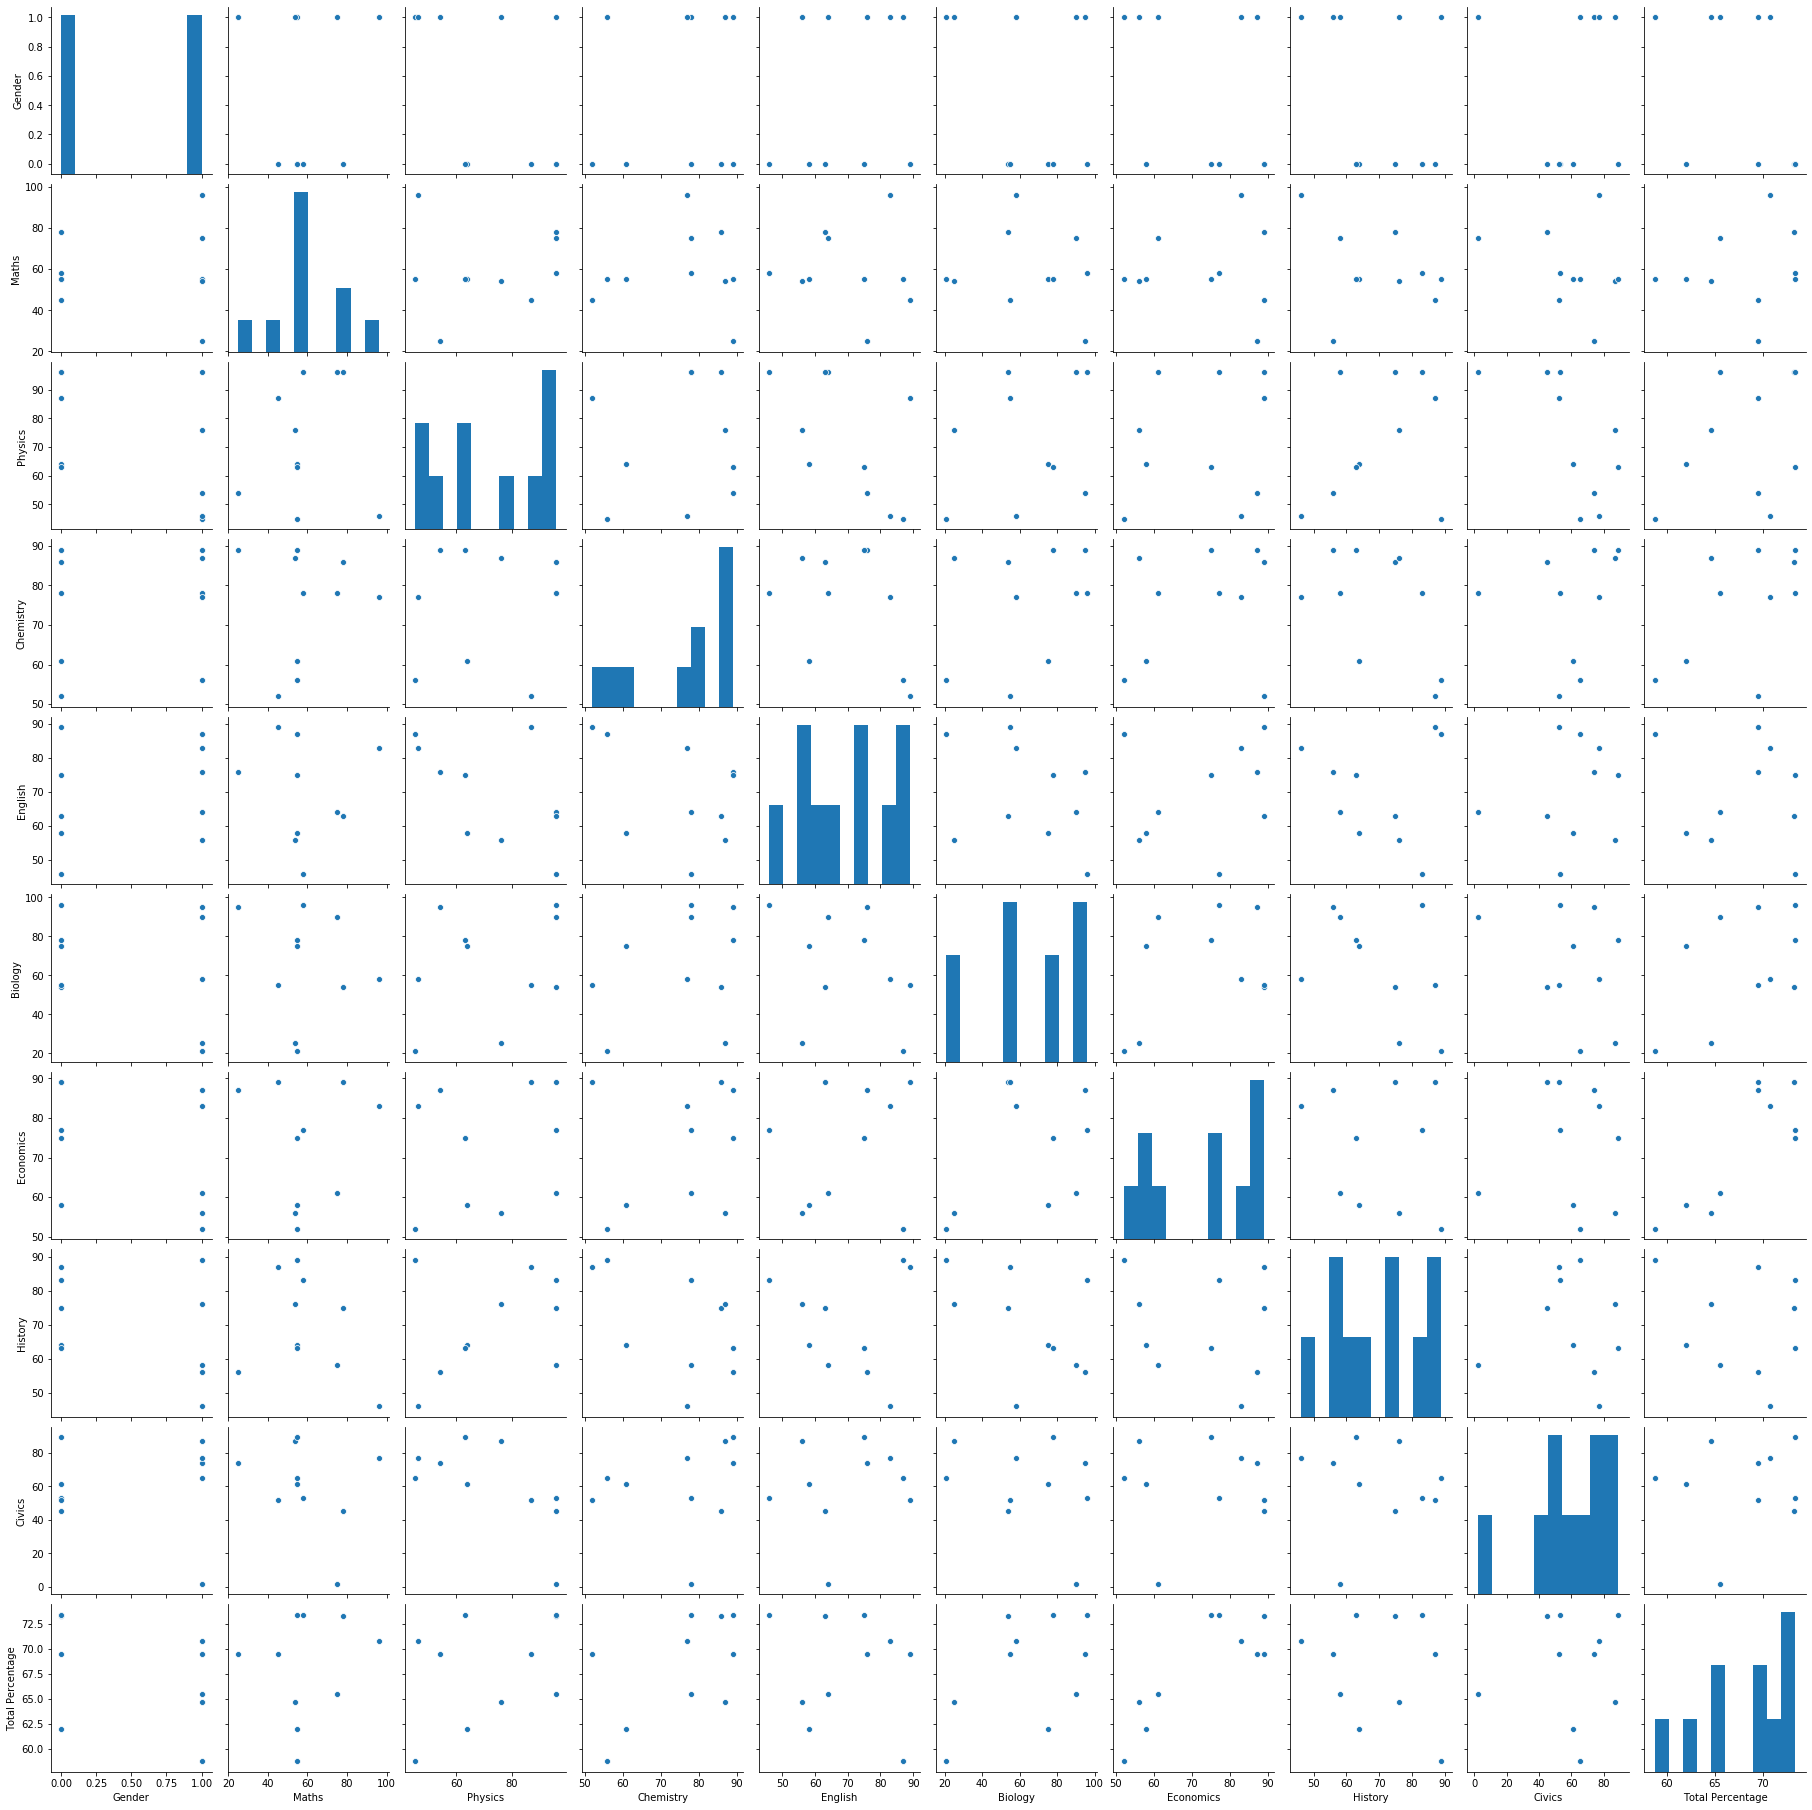

In [54]:
sns.pairplot(df)

In [55]:
df1=df.iloc[:,1:10]
df1.mean()

Maths               59.6000
Physics             72.3000
Chemistry           75.3000
English             69.7000
Biology             64.7000
Economics           72.7000
History             69.7000
Civics              60.5000
Total Percentage    68.0625
dtype: float64

The means of the scores of each subject are calculated

The findings from the correlation plot match the findings from the pairplot

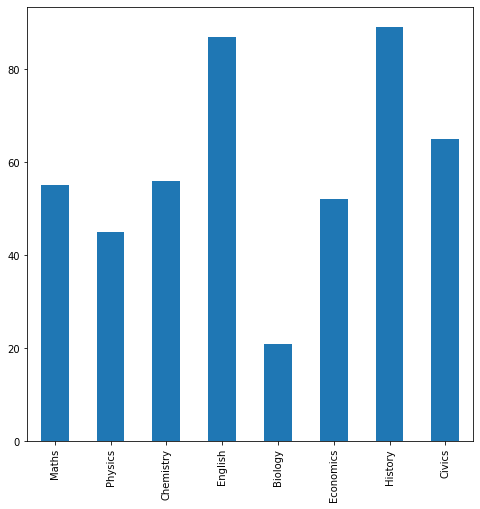

In [56]:
row1=df.iloc[0,1:9]
plt.figure(figsize=(8,8))
row1.plot(kind='bar')

John's Scorecard. Maths: Below average.Physics: Below average.Chemistry:Below average.English:above average.Biology:Below average.Economics: Below average.History:Above average.Civics:Above average.

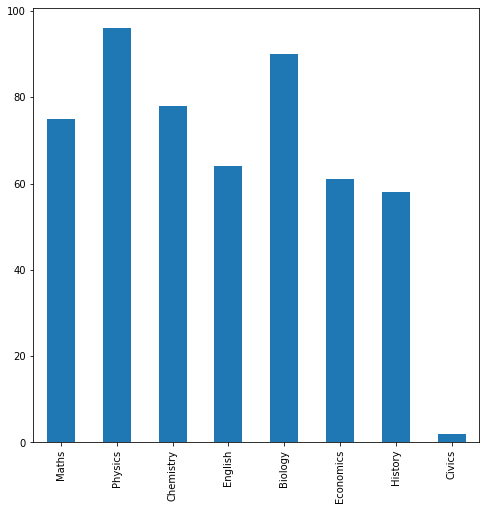

In [57]:
row2=df.iloc[1,1:9]
plt.figure(figsize=(8,8))
row2.plot(kind='bar')

Suresh's Scorecard. Maths: Above average.Physics: above average.Chemistry:above average.English:below average.Biology:above average.Economics: Below average.History:Below average.Civics:below average.

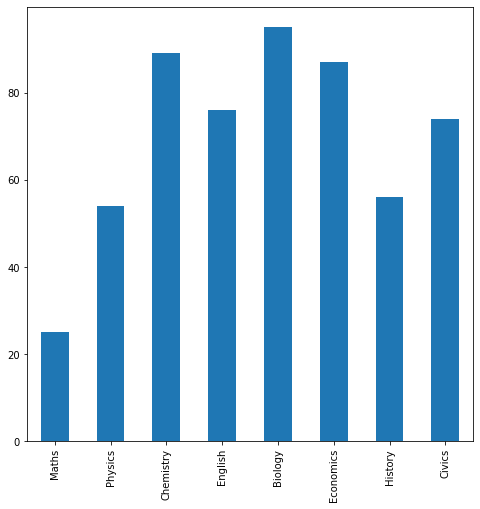

In [58]:
row3=df.iloc[2,1:9]
plt.figure(figsize=(8,8))
row3.plot(kind='bar')

Ramesh's Scorecard. Maths: Below average.Physics: Below average.Chemistry:Above average.English:above average.Biology:above average.Economics: above average.History:Below average.Civics:Above average.

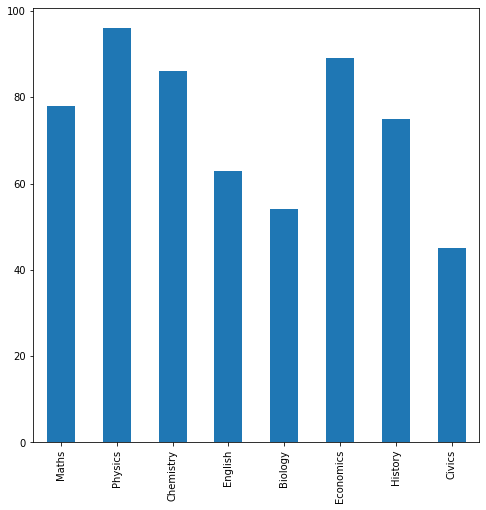

In [59]:
row4=df.iloc[3,1:9]
plt.figure(figsize=(8,8))
row4.plot(kind='bar')

Jessica's Scorecard. Maths: above average.Physics: above average.Chemistry:above average.English:below average.Biology:below average.Economics: above average.History:above average.Civics:below average.

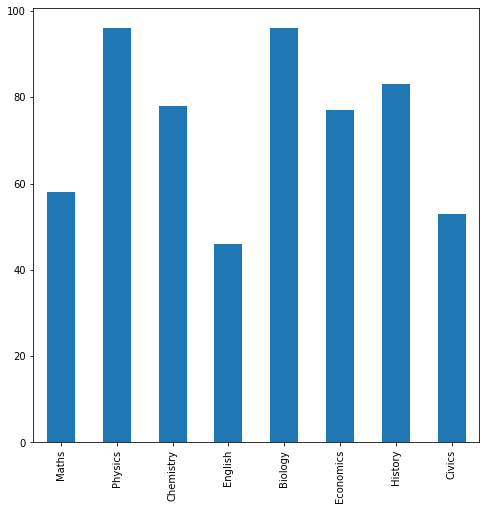

In [60]:
row5=df.iloc[4,1:9]
plt.figure(figsize=(8,8))
row5.plot(kind='bar')

Jennifer's Scorecard. Maths: Below average.Physics: Above average.Chemistry:Above average.English:below average.Biology:above average.Economics: above average.History:above average.Civics:below average.

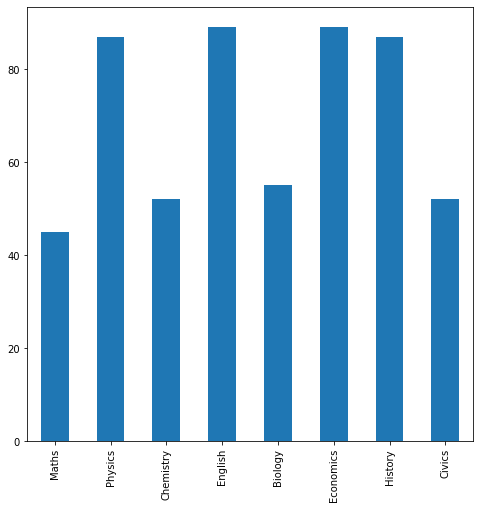

In [61]:
row6=df.iloc[5,1:9]
plt.figure(figsize=(8,8))
row6.plot(kind='bar')

Annu's Scorecard. Maths: Below average.Physics: Above average.Chemistry:below average.English:above average.Biology:below average.Economics: above average.History:above average.Civics:below average.

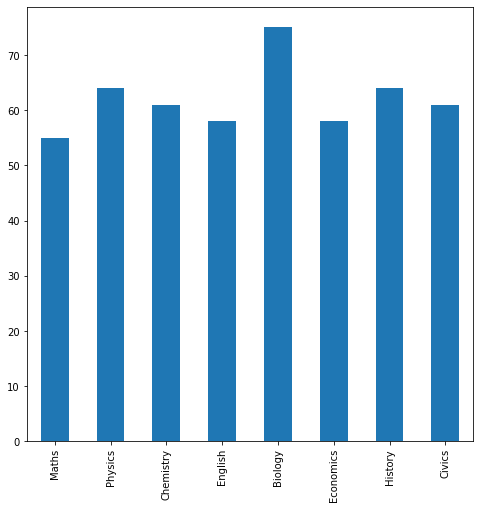

In [62]:
row7=df.iloc[6,1:9]
plt.figure(figsize=(8,8))
row7.plot(kind='bar')

Pooja's Scorecard. Maths: Below average.Physics: Below average.Chemistry:below average.English:below average.Biology:above average.Economics: below average.History:below average.Civics:above average.

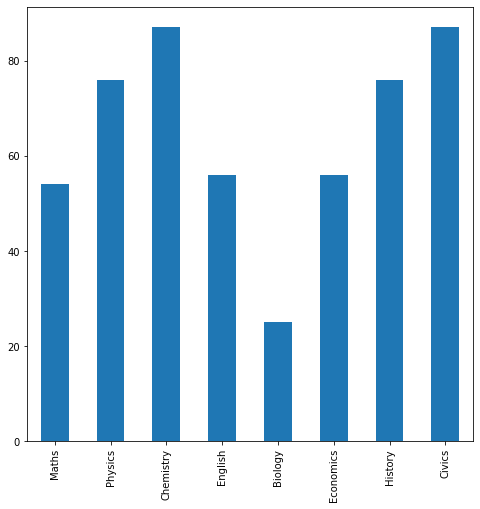

In [63]:
row8=df.iloc[7,1:9]
plt.figure(figsize=(8,8))
row8.plot(kind='bar')

Ritesh's Scorecard. Maths: Below average.Physics: above average.Chemistry:above average.English:below average.Biology:below average.Economics: below average.History:above average.Civics:above average.


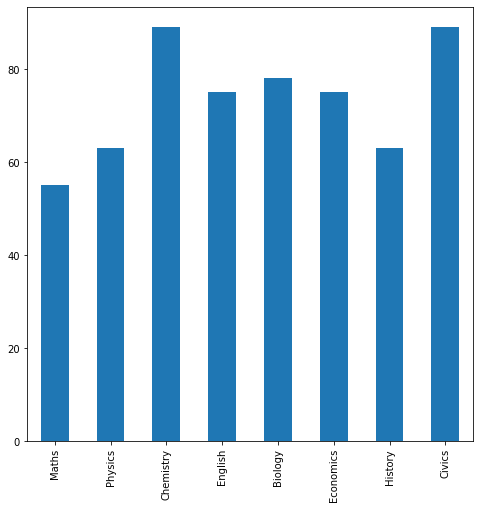

In [64]:
row9=df.iloc[8,1:9]
plt.figure(figsize=(8,8))
row9.plot(kind='bar')

Farha's Scorecard. Maths: Below average.Physics: Below average.Chemistry:above average.English:above average.Biology:above average.Economics: above average.History:below average.Civics:above average.


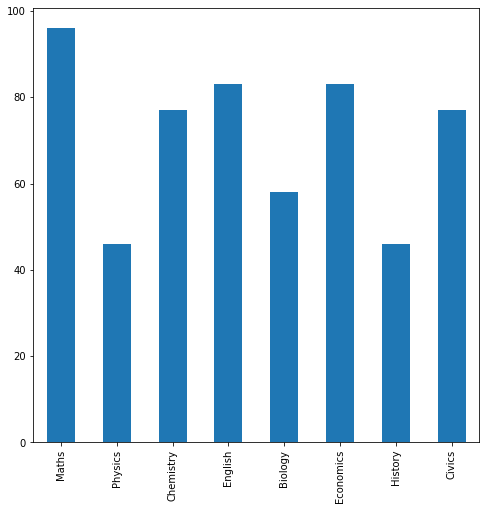

In [65]:
row10=df.iloc[9,1:9]
plt.figure(figsize=(8,8))
row10.plot(kind='bar')

Mukesh's Scorecard. Maths: Above average.Physics: Below average.Chemistry:above average.English:above average.Biology:below average.Economics: above average.History:below average.Civics:above average.

In [66]:
#KMean clustering
from sklearn.cluster import KMeans

In [67]:
kmeans=KMeans(n_clusters=3)
kmodel=kmeans.fit(df)

In [68]:
kmodel.labels_

array([0, 2, 1, 2, 2, 2, 1, 0, 1, 1])

In [69]:
kmodel.cluster_centers_

array([[ 1.     , 54.5    , 60.5    , 71.5    , 71.5    , 23.     ,
        54.     , 82.5    , 76.     , 61.6875 ],
       [ 0.5    , 57.75   , 56.75   , 79.     , 73.     , 76.5    ,
        75.75   , 57.25   , 75.25   , 68.90625],
       [ 0.25   , 64.     , 93.75   , 73.5    , 65.5    , 73.75   ,
        79.     , 75.75   , 38.     , 70.40625]])